# Машинное обучение, ФКН ВШЭ

## Практическое задание 5. Решающие деревья

### Общая информация
Дата выдачи: 05.11.2020

Мягкий дедлайн: 01:59MSK 18.11.2019

Жесткий дедлайн: 01:59MSK 22.11.2019

### О задании

Задание состоит из двух разделов:
1. В первом разделе вы научитесь применять деревья из sklearn для задачи классификации. Вы посмотрите какие разделяющие поверхности деревья строят для различных датасетов и проанализируете их зависимость от различных гиперпараметров.
2. Во втором разделе вы попробуете реализовать свое решающее дерево и сравните его со стандартное имплиментацией из sklearn. Вы также протестируете деревья на более сложных датасетах и сравните различные подходы к кодированию категориальных признаков.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Задания сдаются через систему anytask. Посылка должна содержать:
* Ноутбук homework-practice-05-trees-Username.ipynb
* Модуль hw5code.py
* Ссылки на посылки в Яндекс.Контесте для обеих задач

В контест https://contest.yandex.ru/contest/21899 нужно отправить файл hw5code.py с реализованными функциями и классами.

Username — ваша фамилия и имя на латинице именно в таком порядке

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже:

__Оценка:__ 10

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from matplotlib.colors import Colormap, ListedColormap
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# 1. Решающие деревья. Визуализация.

В этой части мы рассмотрим два простых двумерных датасета сделанных с помощью `make_moons`, `make_circles` и посмотрим как ведет себя разделяющая поверхность в зависимости от различных гиперпараметров.

In [2]:
from sklearn.datasets import make_moons, make_circles, make_classification
datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(n_classes=3, n_clusters_per_class=1, n_features=2, class_sep=.8, random_state=3,
                        n_redundant=0., )
]

In [3]:
palette = sns.color_palette(n_colors=3)
cmap = ListedColormap(palette)

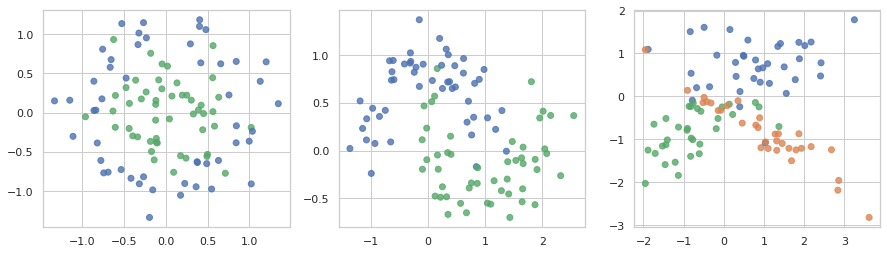

In [4]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, alpha=.8)

__Задание 1. (1 балл)__

Для каждого датасета обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделящие поверхности (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились?

In [5]:
def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)

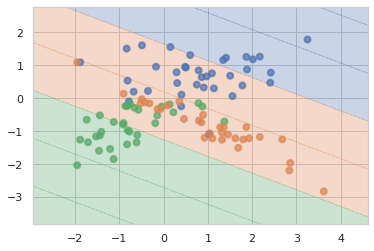

In [6]:
# Пример:
from sklearn.linear_model import LinearRegression
X, y = datasets[2]
lr  = LinearRegression().fit(X, y)
plot_surface(lr, X, y)

accuracy score is: 0.72


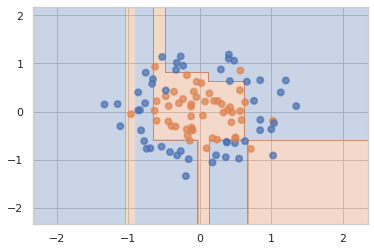

In [7]:
X, y = datasets[0]
x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=500, shuffle=True, stratify=y
)

clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)
print("accuracy score is:", accuracy_score(y_test, clf.predict(x_test)))
plot_surface(clf, X, y)

accuracy score is: 0.88


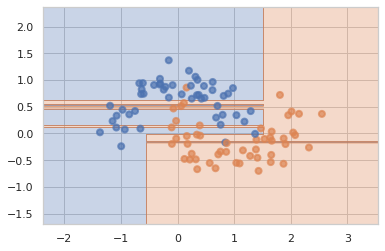

In [8]:
X, y = datasets[1]
x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=500, shuffle=True, stratify=y
)

clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)
print("accuracy score is:", accuracy_score(y_test, clf.predict(x_test)))
plot_surface(clf, X, y)

, Test accuracy score is 0.84


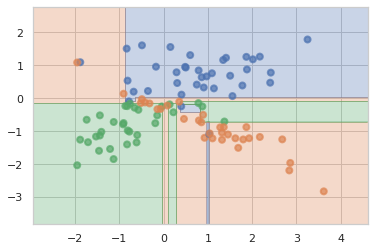

In [9]:
X, y = datasets[2]
x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=500, shuffle=True, stratify=y
)

clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)
print(
    ", Test accuracy score is "
    + str(accuracy_score(y_test, clf.predict(x_test)))
)
plot_surface(clf, X, y)

__Ответ:__ я бы не сказал, что они слишком сильно переобучились, но всё же они переобучились: 1 и 3 вполне неплохо выделили области объектов, хотя есть области "переобучения", например на 1 дереве видно, что это выброс, а для него целую полосу построили. 2 дерево выглядит сильно переобученным, на нём много тонких областей, которые не сильно показывают оптимальное настоящее разбиение.

__Задание 2. (1.5 балла)__

Попробуйте перебрать несколько параметров для регуляризации (напр. `max_depth`, `min_samples_leaf`). Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки. Можно делать кросс-валидацию или просто разбиение на трейн и тест, главное делайте каждый раз одинаковое разбиение, чтобы можно было корректно сравнивать (помните же, что итоговое дерево сильно зависит от небольшого изменения обучающей выборки?).

In [10]:
max_depth_list = [2, 4, 25]
min_samples_leaf = [2, 4, 12]


def compare_tree_params(X, y, dataset, max_depth, min_samples):
    X, y = dataset
    x_train, x_test, y_train, y_test = train_test_split(
        X, y, test_size=0.25, random_state=500, shuffle=True, stratify=y
    )

    fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(13, 10))
    counter = 1
    for i in range(len(max_depth)):
        for j in range(len(min_samples)):
            clf = DecisionTreeClassifier(
                max_depth=max_depth[i], min_samples_leaf=min_samples[j]
            )
            clf.fit(x_train, y_train)
            print(
                "Max_depth: "
                + str(max_depth[i])
                + ", Min_samples_leaf: "
                + str(min_samples[j])
                + "; Train accuracy: "
                + str(accuracy_score(y_train, clf.predict(x_train)))
                + ", Test accuracy: "
                + str(accuracy_score(y_test, clf.predict(x_test)))
            )
            plt.subplot(3, 3, counter)
            plot_surface(clf, X, y)
            counter += 1

Max_depth: 2, Min_samples_leaf: 2; Train accuracy: 0.76, Test accuracy: 0.72
Max_depth: 2, Min_samples_leaf: 4; Train accuracy: 0.76, Test accuracy: 0.72
Max_depth: 2, Min_samples_leaf: 12; Train accuracy: 0.76, Test accuracy: 0.72
Max_depth: 4, Min_samples_leaf: 2; Train accuracy: 0.9333333333333333, Test accuracy: 0.8
Max_depth: 4, Min_samples_leaf: 4; Train accuracy: 0.9333333333333333, Test accuracy: 0.8
Max_depth: 4, Min_samples_leaf: 12; Train accuracy: 0.8666666666666667, Test accuracy: 0.8
Max_depth: 25, Min_samples_leaf: 2; Train accuracy: 0.9466666666666667, Test accuracy: 0.8
Max_depth: 25, Min_samples_leaf: 4; Train accuracy: 0.9333333333333333, Test accuracy: 0.8
Max_depth: 25, Min_samples_leaf: 12; Train accuracy: 0.8666666666666667, Test accuracy: 0.8


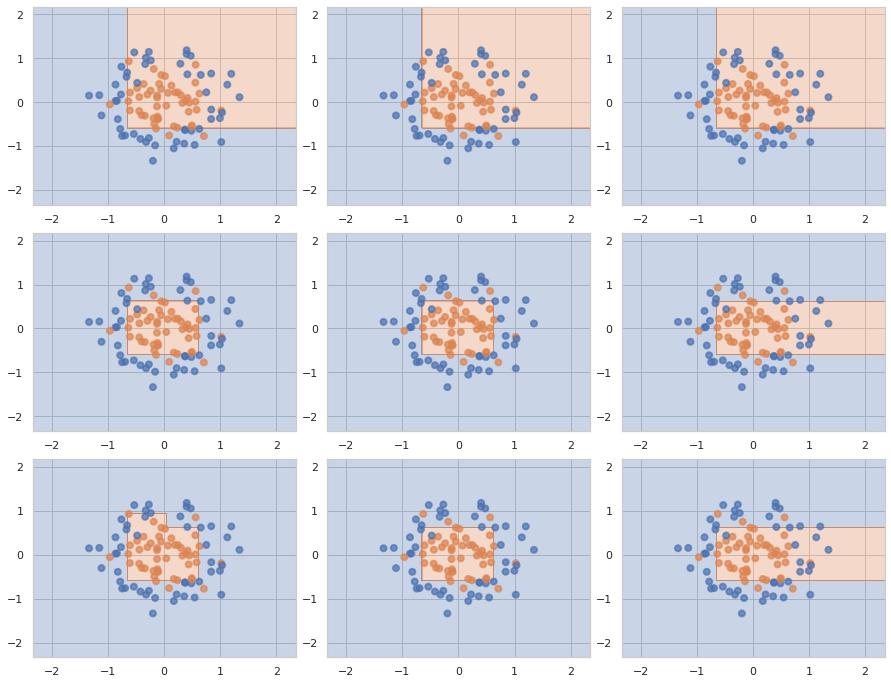

In [11]:
compare_tree_params(X, y, datasets[0], max_depth_list, min_samples_leaf)

Max_depth: 2, Min_samples_leaf: 2; Train accuracy: 0.92, Test accuracy: 0.84
Max_depth: 2, Min_samples_leaf: 4; Train accuracy: 0.92, Test accuracy: 0.84
Max_depth: 2, Min_samples_leaf: 12; Train accuracy: 0.8666666666666667, Test accuracy: 0.72
Max_depth: 4, Min_samples_leaf: 2; Train accuracy: 0.9333333333333333, Test accuracy: 0.8
Max_depth: 4, Min_samples_leaf: 4; Train accuracy: 0.9333333333333333, Test accuracy: 0.84
Max_depth: 4, Min_samples_leaf: 12; Train accuracy: 0.8666666666666667, Test accuracy: 0.72
Max_depth: 25, Min_samples_leaf: 2; Train accuracy: 0.9466666666666667, Test accuracy: 0.8
Max_depth: 25, Min_samples_leaf: 4; Train accuracy: 0.9333333333333333, Test accuracy: 0.84
Max_depth: 25, Min_samples_leaf: 12; Train accuracy: 0.8666666666666667, Test accuracy: 0.72


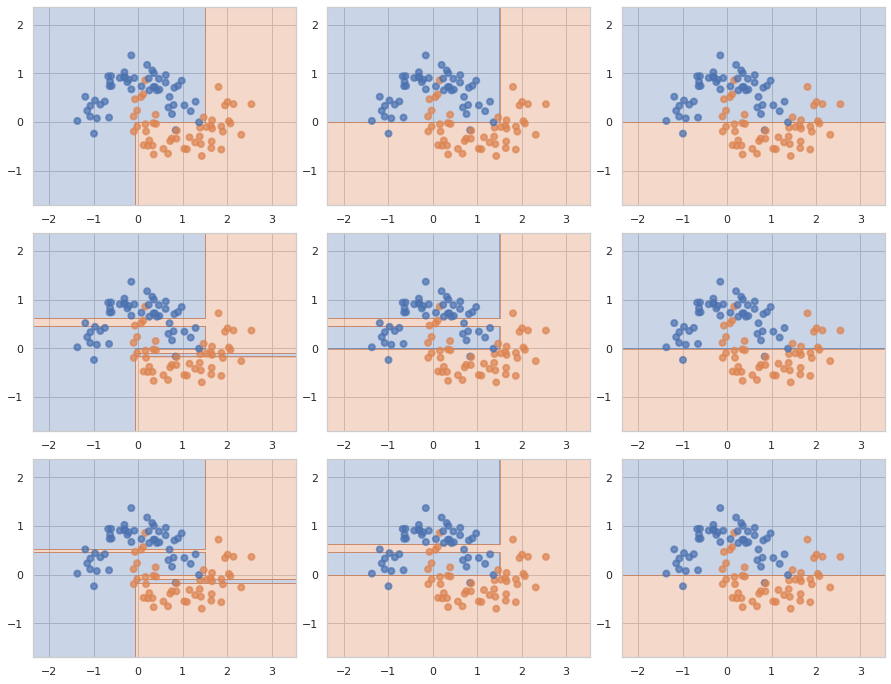

In [12]:
compare_tree_params(X, y, datasets[1], max_depth_list, min_samples_leaf)

Max_depth: 2, Min_samples_leaf: 2; Train accuracy: 0.8933333333333333, Test accuracy: 0.8
Max_depth: 2, Min_samples_leaf: 4; Train accuracy: 0.8666666666666667, Test accuracy: 0.84
Max_depth: 2, Min_samples_leaf: 12; Train accuracy: 0.8666666666666667, Test accuracy: 0.84
Max_depth: 4, Min_samples_leaf: 2; Train accuracy: 0.92, Test accuracy: 0.84
Max_depth: 4, Min_samples_leaf: 4; Train accuracy: 0.8666666666666667, Test accuracy: 0.92
Max_depth: 4, Min_samples_leaf: 12; Train accuracy: 0.8666666666666667, Test accuracy: 0.84
Max_depth: 25, Min_samples_leaf: 2; Train accuracy: 0.92, Test accuracy: 0.84
Max_depth: 25, Min_samples_leaf: 4; Train accuracy: 0.8666666666666667, Test accuracy: 0.92
Max_depth: 25, Min_samples_leaf: 12; Train accuracy: 0.8666666666666667, Test accuracy: 0.84


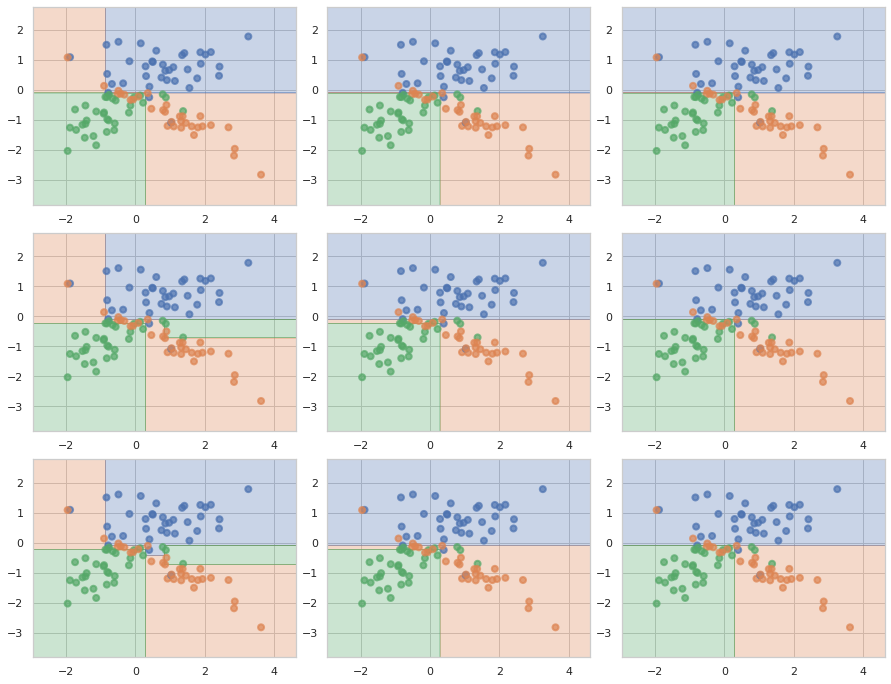

In [13]:
compare_tree_params(X, y, datasets[2], max_depth_list, min_samples_leaf)

__Вопрос:__ Проследите как меняется разделяющая поверхность и обобщающая способность. Почему так происходит, одинаково ли изменение для разных датасетов?

__Ответ:__ Видимо, что если мы ставим большие ограничение на минимальное количестов объектов в листах, то плоскость разделяется хуже, раньше происходит остановка, это логично, мы не даём до конца обучиться дереву. Мы, конечно, в некоторой степени избавляемся от переобучения, но качество становится хуже. Но при этом, если этот параметр слишком маленький, то дерево склонно к переобучению. Хорошо видно это на первом датасете, где качество на обучении было лучше, а на тесте оно стало хуже, по сравнению с другими деревьями, которые обучались на других параметрах.

Второй параметр наоборот повышает вероятность переобучения: мы не ограничиваем глубину, поэтому дерево продолжает деление и начинает подстраиваться под выбросы.

Можно ещё заметить, что если мы повышаем минимальное количество объектов в листе, то несмотря на большую глубину, дерево не успевает переобучаться, так как вершины быстро становятся терминальными.

Изменения, в принципе, одинаковые для датасетов, их суть не меняется, просто на некоторых это не так критично, например, для первого датасета нужного немного делений, чтобы аккуратно разделить объекта, для 2 и 3 датасета их нужно больше.

# 2. Решающие деревья своими руками

В этой части вам нужно реализовать свой класс для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

__Задание 3. (1.5 балл)__

Реализуйте функцию find_best_split из модуля hw5code.py

Реализовал.

__Задание 4. (0.5 балла)__

Загрузите таблицу [students.csv](https://drive.google.com/file/d/0B2zoFVYw1rN3a0d0Zm43TzQ4aUU/view?usp=sharing) (это немного преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). В ней признаки объекта записаны в первых пяти столбцах, а в последнем записана целевая переменная (класс: 0 или 1). Постройте на одном изображении пять кривых "порог — значение критерия Джини" для всех пяти признаков. Отдельно визуализируйте scatter-графики "значение признака — класс" для всех пяти признаков.

In [14]:
df = pd.read_csv("students.csv")

Давайте вначале посмотрим на данные:

In [15]:
df.head(6)

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.00,0.00,0.00,0.00,0
1,0.08,0.08,0.10,0.24,0.90,1
2,0.06,0.06,0.05,0.25,0.33,0
3,0.10,0.10,0.15,0.65,0.30,1
4,0.08,0.08,0.08,0.98,0.24,0
5,0.09,0.15,0.40,0.10,0.66,1


Посмотрели, всё ясно. Можно приступать к работе:

In [16]:
from hw5code import find_best_split

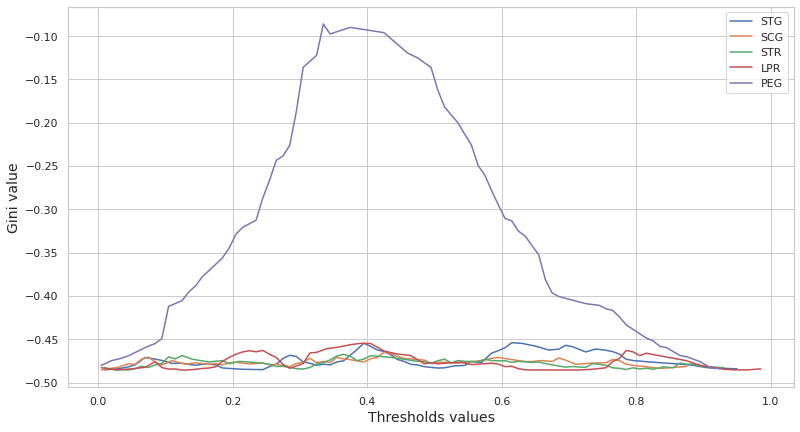

In [17]:
plt.figure(figsize=(13,7))
plt.ylabel("Gini value", fontsize=14)
plt.xlabel("Thresholds values", fontsize=14)
for column in df.columns[:-1]:
    thresholds, ginis, _, _ = find_best_split(df[column].values, df[" UNS"].values)
    plt.plot(thresholds, ginis, label=column)

plt.legend()
plt.show()

In [18]:
def plot_classes(X, y, title):
    colors=["grey", "olive"]
    plt.title(title, fontsize=14)
    plt.scatter(X, y, c=y, cmap=ListedColormap(colors))
    plt.xlabel("Feature value", fontsize=12)
    plt.ylabel("Class", fontsize=12)

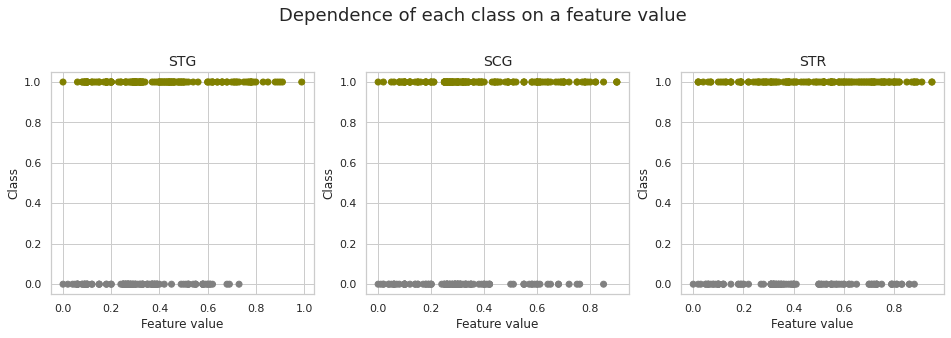

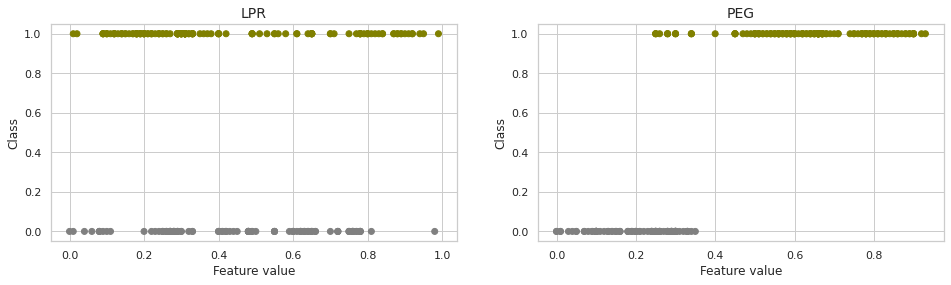

In [19]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16, 9))
fig.suptitle("Dependence of each class on a feature value", fontsize=18)
plt.subplot(2, 3, 1)
plot_classes(df["STG"].values, df[" UNS"].values, "STG")
plt.subplot(2, 3, 2)
plot_classes(df["SCG"].values, df[" UNS"].values, "SCG")
plt.subplot(2, 3, 3)
plot_classes(df["STR"].values, df[" UNS"].values, "STR")

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 4))
plt.subplot(1, 2, 1)
plot_classes(df["LPR"].values, df[" UNS"].values, "LPR")
plt.subplot(1, 2, 2)
plot_classes(df["PEG"].values, df[" UNS"].values, "PEG")

__Задание 5. (0.5 балла)__

Исходя из кривых значений критерия Джини, по какому признаку нужно производить деление выборки на два поддерева? Согласуется ли этот результат с визуальной оценкой scatter-графиков? Как бы охарактеризовали вид кривой для "хороших" признаков, по которым выборка делится почти идеально? Чем отличаются кривые для признаков, по которым деление практически невозможно?

**Ответ:** Деление следует производить по признаку "PEG". Мы видим на графике, что для него критерий Джини достигал максимального значения. Результат согласуется с оценкой sctter-графиков: если внимательно посмотрим на них, то увидим, что именно у "PEG" видна практически чёткая граница разделения объектов по классам, у других признаков такого нет. 

Я бы сказал, что кривая для хороших признаков немного похожа на пирамидку/холм/гору/кочку: то есть она практически монотонно возрастает до какого-то порога, а затем убывает. Для других признаков у кривых неясное поведение, они выдают примерно одинаковые значения в неком интервале, нет заметного улучшения коэффициента Джини, а из-за этого неясно, как следует делить классы. Скажем так, те кривые не уверены в своём делении классов.

__Задание 6. (1.5 балла).__

Разберитесь с уже написанным кодом в классе DecisionTree модуля hw5code.py. Найдите ошибки в реализации метода \_fit_node. Напишите функцию \_predict_node.

 Построение дерева осуществляется согласно базовому жадному алгоритму, предложенному в [лекции](https://github.com/esokolov/ml-course-hse/blob/master/2020-fall/lecture-notes/lecture07-trees.pdf) в разделе «Построение дерева». Выбор лучшего разбиения необходимо производить по критерию Джини. Критерий останова: все объекты в листе относятся к одному классу или ни по одному признаку нельзя разбить выборку. Ответ в листе: наиболее часто встречающийся класс в листе. Для категориальных признаков выполняется преобразование, описанное в лекции в разделе «Учет категориальных признаков».

Разобрался.

__Задание 7. (0.5 балла)__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно скачать таблицу agaricus-lepiota.data (из [Data Folder](https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/)), прочитать ее с помощью pandas, применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево.

In [5]:
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
from hw5code import DecisionTree

In [4]:
df = pd.read_csv("agaricus-lepiota.data", header=None)
df

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [98]:
df[0] = np.where(df[0] == "e", 1, 0)

X = df.drop(columns=[0])
y = df[0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=777, stratify=y)

In [99]:
feature_types = ["categorical"] * 22

In [100]:
X_train = X_train.apply(LabelEncoder().fit_transform)

In [101]:
clf_tree = DecisionTree(feature_types=feature_types)

In [102]:
clf_tree.fit(X_train.values, y_train.values)

In [103]:
X_test = X_test.apply(LabelEncoder().fit_transform)

In [104]:
y_pred = clf_tree.predict(X_test.values)
accuracy_score(y_test, y_pred)

1.0

Здорово, модель идеально предсказывает ядовитые грибы.

__Задание 8. (бонус, 1 балл)__

Реализуйте в классе DecisionTree поддержку параметров max_depth, min_samples_split и min_samples_leaf по аналогии с DecisionTreeClassifier. Постройте графики зависимости качества предсказания в зависимости от этих параметров для набора данных tic-tac-toe (см. следующий пункт).

__Задание 9. (2 балла)__

Загрузите следующие наборы данных (напомним, что pandas умеет загружать файлы по url, в нашем случае это файл \*.data), предварительно ознакомившись с описанием признаков и целевой переменной в каждом из них (она записаны в Data Folder, в файле *.names): 
* [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom) (загрузили в предыдущем пункте, классы записаны в нулевом столбце),
* [tic-tac-toe](https://archive.ics.uci.edu/ml/datasets/Tic-Tac-Toe+Endgame) (классы записаны в последнем столбце)
* [cars](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation) (классы записаны в последнем столбце, считаем что unacc, acc — это класс 0, good, vgood — класс 1)
* [nursery](https://archive.ics.uci.edu/ml/datasets/Nursery) (классы записаны в последнем столбце, считаем, что not_recom и recommend — класс 0, very_recom, priority, spec_prior — класс 1).

Закодируйте категориальные признаки, использовав LabelEncoder. С помощью cross_val_score (cv=10) оцените accuracy на каждом из этих наборов данных следующих алгоритмов:
* DecisionTree, считающий все признаки вещественными
* DecisionTree, считающий все признаки категориальными
* DecisionTree, считающий все признаки вещественными + one-hot-encoding всех признаков
* DecisionTreeClassifier из sklearn. Запишите результат в pd.DataFrame (по строкам — наборы данных, по столбцам — алгоритмы).

Рекомендации:
* Чтобы cross_val_score вычисляла точность, нужно передать scoring=make_scorer(accuracy_score), обе фукнции из sklearn.metrics.
* Если вам позволяет память (а она скорее всего позволяет), указывайте параметр sparse=False в OneHotEncoder (если вы, конечно, используете его). Иначе вам придется добиваться того, чтобы ваша реализация дерева умела работать с разреженными матрицами (что тоже, в целом, не очень сложно).

In [105]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

In [106]:
feature_types = ["real"] * 22

In [107]:
X_encoded = X.apply(LabelEncoder().fit_transform)

In [108]:
clf_tree = DecisionTree(feature_types=feature_types)
result = cross_val_score(clf_tree, X_encoded.values, y.values, cv=10, scoring=make_scorer(accuracy_score))

In [109]:
results_mushroom = []
results_mushroom.append(result.mean())

In [110]:
feature_types = ["categorical"] * 22
clf_tree = DecisionTree(feature_types=feature_types)
result = cross_val_score(clf_tree, X_encoded.values, y.values, cv=10, scoring=make_scorer(accuracy_score))

In [111]:
results_mushroom.append(result.mean())

In [112]:
X_onehot = OneHotEncoder(sparse=False).fit_transform(X)

In [113]:
feature_types = ["real"] * 117
clf_tree = DecisionTree(feature_types=feature_types)
result = cross_val_score(clf_tree, X_onehot, y.values, cv=10, scoring=make_scorer(accuracy_score))

In [114]:
results_mushroom.append(result.mean())

In [115]:
result = cross_val_score(DecisionTreeClassifier(), X_encoded, y, cv=10, scoring=make_scorer(accuracy_score))

In [116]:
results_mushroom.append(result.mean())

In [117]:
results_mushroom

[0.9992610837438424, 1.0, 0.9996305418719211, 0.964817103836063]

Завершили работу с грибами, приступим к следующему датасету:

In [118]:
df = pd.read_csv("tic-tac-toe.data", header=None)
df.head(6)

,0,1,2,3,4,5,6,7,8,9
0,x,x,x,x,o,o,x,o,o,positive
1,x,x,x,x,o,o,o,x,o,positive
2,x,x,x,x,o,o,o,o,x,positive
3,x,x,x,x,o,o,o,b,b,positive
4,x,x,x,x,o,o,b,o,b,positive
5,x,x,x,x,o,o,b,b,o,positive


In [119]:
df[9] = np.where(df[9] == "positive", 1, 0)

X = df.drop(columns=[9])
y = df[9]

In [120]:
X_encoded = X.apply(LabelEncoder().fit_transform)

In [121]:
results_tictac = []

In [122]:
X_encoded.shape

(958, 9)

In [123]:
clf_tree = DecisionTree(feature_types=["real"] * 9)
result = cross_val_score(clf_tree, X_encoded.values, y.values, cv=10, scoring=make_scorer(accuracy_score))

In [124]:
results_tictac.append(result.mean())

In [125]:
clf_tree = DecisionTree(feature_types=["categorical"] * 9)
result = cross_val_score(clf_tree, X_encoded.values, y.values, cv=10, scoring=make_scorer(accuracy_score))

In [126]:
results_tictac.append(result.mean())

In [127]:
X_onehot = OneHotEncoder(sparse=False).fit_transform(X)

In [128]:
X_onehot.shape

(958, 27)

In [129]:
clf_tree = DecisionTree(feature_types=["real"] * 27)
result = cross_val_score(clf_tree, X_onehot, y.values, cv=10, scoring=make_scorer(accuracy_score))

In [130]:
results_tictac.append(result.mean())

In [131]:
result = cross_val_score(DecisionTreeClassifier(), X_encoded, y, cv=10, scoring=make_scorer(accuracy_score))
results_tictac.append(result.mean())

In [132]:
results_tictac

[0.46649122807017546,
 0.5414583333333333,
 0.5435745614035088,
 0.759188596491228]

Приступим к следующему датасету:

In [133]:
df = pd.read_csv("car.data", header=None)
df.head(6)

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
5,vhigh,vhigh,2,2,med,high,unacc


In [134]:
df.loc[df[6] == "unacc", 6] = "0"
df.loc[df[6] == "acc", 6] = "0"
df.loc[df[6] == "good", 6] = "1"
df.loc[df[6] == "vgood", 6] = "1"

In [135]:
df[6].value_counts()

0    1594
1     134
Name: 6, dtype: int64

In [136]:
X = df.drop(columns=[6])
y = df[6]

In [137]:
X_encoded = X.apply(LabelEncoder().fit_transform)
X_encoded.shape

(1728, 6)

In [138]:
results_cars = []

In [139]:
clf_tree = DecisionTree(feature_types=["real"] * 6)
result = cross_val_score(clf_tree, X_encoded.values, y.values, cv=10, scoring=make_scorer(accuracy_score))

In [140]:
results_cars.append(result.mean())

In [141]:
clf_tree = DecisionTree(feature_types=["categorical"] * 6)
result = cross_val_score(clf_tree, X_encoded.values, y.values, cv=10, scoring=make_scorer(accuracy_score))

In [142]:
results_cars.append(result.mean())

In [143]:
X_onehot = OneHotEncoder(sparse=False).fit_transform(X)
X_onehot.shape

(1728, 21)

In [144]:
clf_tree = DecisionTree(feature_types=["real"] * 21)
result = cross_val_score(clf_tree, X_onehot, y.values, cv=10, scoring=make_scorer(accuracy_score))

In [145]:
results_cars.append(result.mean())

In [146]:
result = cross_val_score(DecisionTreeClassifier(), X_encoded, y, cv=10, scoring=make_scorer(accuracy_score))
results_cars.append(result.mean())

In [147]:
results_cars

[0.9274936147331632,
 0.9322153515257428,
 0.9321447775238607,
 0.9432853878209437]

Перейдём к финальном датасету:

In [71]:
df = pd.read_csv("nursery.data",  header=None)
df.head(6)

,0,1,2,3,4,5,6,7,8
0,usual,proper,complete,1,convenient,convenient,nonprob,recommended,recommend
1,usual,proper,complete,1,convenient,convenient,nonprob,priority,priority
2,usual,proper,complete,1,convenient,convenient,nonprob,not_recom,not_recom
3,usual,proper,complete,1,convenient,convenient,slightly_prob,recommended,recommend
4,usual,proper,complete,1,convenient,convenient,slightly_prob,priority,priority
5,usual,proper,complete,1,convenient,convenient,slightly_prob,not_recom,not_recom


In [72]:
df.shape

(12960, 9)

In [74]:
df.loc[df[8] == "not_recom", 8] = "0"
df.loc[df[8] == "recommend", 8] = "0"
df.loc[df[8] == "priority", 8] = "1"
df.loc[df[8] == "very_recom", 8] = "1"
df.loc[df[8] == "spec_prior", 8] = "1"

In [75]:
X = df.drop(columns=[8])
y = df[8]
X_encoded = X.apply(LabelEncoder().fit_transform)

In [76]:
X_encoded.shape

(12960, 8)

In [77]:
results_nurse = []

In [78]:
clf_tree = DecisionTree(feature_types=["real"] * 8)
result = cross_val_score(clf_tree, X_encoded.values, y.values, cv=10, scoring=make_scorer(accuracy_score))
results_nurse.append(result.mean())

In [79]:
clf_tree = DecisionTree(feature_types=["categorical"] * 8)
result = cross_val_score(clf_tree, X_encoded.values, y.values, cv=10, scoring=make_scorer(accuracy_score))
results_nurse.append(result.mean())

In [80]:
X_onehot = OneHotEncoder(sparse=False).fit_transform(X)
X_onehot.shape

(12960, 27)

In [81]:
clf_tree = DecisionTree(feature_types=["real"] * 27)
result = cross_val_score(clf_tree, X_onehot, y.values, cv=10, scoring=make_scorer(accuracy_score))

In [82]:
results_nurse.append(result.mean())

In [83]:
result = cross_val_score(DecisionTreeClassifier(), X_encoded, y, cv=10, scoring=make_scorer(accuracy_score))
results_nurse.append(result.mean())

In [84]:
results_nurse

[0.9998456790123458,
 0.9998456790123458,
 0.9998456790123458,
 0.9996913580246914]

Завершили сбор данных, сейчас будем проводить аналитику.

In [148]:
total_results = np.concatenate(
    (
        np.array([results_mushroom]),
        np.array([results_tictac]),
        np.array([results_cars]),
        np.array([results_nurse]),
    ),
    axis=0,
)

In [149]:
df_results = pd.DataFrame(
    total_results,
    columns=[
        "DecisionTree all real",
        "DecisionTree all categorical",
        "DecisionTree onehot",
        "Sklearn tree",
    ],
    index=["Mushrooms", "TicTacToe", "Cars", "Nursery"],
)

In [150]:
df_results

,DecisionTree all real,DecisionTree all categorical,DecisionTree onehot,Sklearn tree
Mushrooms,0.999261,1.000000,0.999631,0.964817
TicTacToe,0.466491,0.541458,0.543575,0.759189
Cars,0.927494,0.932215,0.932145,0.943285
Nursery,0.999846,0.999846,0.999846,0.999691


*Как чудесно и красиво! В следующем задании займёмся анализом этих данных.* ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

__Задание 10. (1 балла)__

Проанализируйте результаты эксперимента. 
Одинаково ли для разных наборов данных ранжируются алгоритмы? 
Порассуждайте, почему так происходит. 

Обратите внимание на значение признаков в разных наборах данных. 
Присутствует ли в результатах какая-то компонента случайности? 
Можно ли повлиять на нее и улушить работу алгоритмов?

**Ответ:** Вначале протестурием кое-что:

In [151]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=10, shuffle=True)

In [152]:
df = pd.read_csv("tic-tac-toe.data", header=None)

In [154]:
df[9] = np.where(df[9] == "positive", 1, 0)
X = df.drop(columns=[9])
y = df[9]

In [155]:
X_encoded = X.apply(LabelEncoder().fit_transform)

In [156]:
X_encoded.shape

(958, 9)

In [157]:
results_cool = []

In [158]:
results_cool.append(
    np.mean(
        cross_val_score(
            DecisionTree(feature_types=["real"] * 9),
            X_encoded.values,
            y.values,
            cv=skf,
            scoring=make_scorer(accuracy_score),
        )
    )
)
results_cool.append(
    np.mean(
        cross_val_score(
            DecisionTree(feature_types=["categorical"] * 9),
            X_encoded.values,
            y.values,
            cv=skf,
            scoring=make_scorer(accuracy_score),
        )
    )
)
results_cool.append(
    np.mean(
        cross_val_score(
            DecisionTreeClassifier(),
            X_encoded.values,
            y.values,
            cv=skf,
            scoring=make_scorer(accuracy_score),
        )
    )
)

In [159]:
results_cool

[0.8766995614035087, 0.9530263157894737, 0.8852631578947369]

__Ответ__: Сейчас мы попробовали перемешать датасет "tictactoe" для трейна/теста, сохраняя пропорции класса. Результат получился лучше. У меня предпололжение, что это из-за состава самого датасета, если внимательно смотреть колонки, то видно, что, например, в первой, достаточно долго идёт "х", а потом начинаются другие значения. Аналогичная ситуация и для других. Из-за этого, если не включать shuffle, то датасет может получаться не совсем "правдоподобным", на тесте могут быть другие кобминации, к которым дерево не было натренировано.

И, в принципе, как я считаю, качество на этом датасете получилось хуже из-за специфики данных. В реальной жизни ведь важно не только, в какой клетке стоял "крестик", а в какой ход его туда поставили и после каких комбинаций. Дерево это может не учитывать (как минимум, оно не знает последовательность ходов), из-за чего выдаёт качество хуже.

In [160]:
df_results

,DecisionTree all real,DecisionTree all categorical,DecisionTree onehot,Sklearn tree
Mushrooms,0.999261,1.000000,0.999631,0.964817
TicTacToe,0.466491,0.541458,0.543575,0.759189
Cars,0.927494,0.932215,0.932145,0.943285
Nursery,0.999846,0.999846,0.999846,0.999691


__Ответ:__ Для удобства выведем ещё раз тут датасет и посмотрим.

Вначале, конечно, видим, что наше дерево работает лучше с категориальными признаками, когда мы всё-таки указываем ему, что они категориальные. Ведь их значения - это всё-таки не цифры, а категории, а в нашем дереве стоит специальный счётчик, который эти категории учитывает. 

Onehot, в принципе, работает примерно так же, единственное, считает дольше, потому что у нас много колонок, из-за чего дольше перебор. Хоть мы и используем "real" в дереве, оно хорошо делит признаки, потому что у нас все колонки состоят из 0, 1, что указывает на принадлежность к одной или другой категории (не точно, так как нужно проверить и остальные колонки), поэтому дерево будет ветвиться, постепенно разбивая объекты по разным категориям. А если категории были закодированы с помощью счётчиков, то дерево тоже будет делить объекты по категориям, выбирая оптимальный порог.

Насчёт, Sklearn tree, по всем параметрам оно соответствует нашему дереву, prunning также не выполняется, предполагаю (видел у них на сайте формулу), что разница в том, что у них немного по-другому считается сам коэффициент Gini, а именно H(). 
Также у них немного отличается обучение, оно не такое "жадное", как у нас, там случайно выбирается признак для разбиения, а для него уже выбирается лучшее разбиение, это процедура повторяется заданное количество раз, по умолчанию, как я понял она повторяется столько раз, сколько признаков в датасете. Поэтому на рандоме иногда он обыгрывает наше дерево, иногда не особо.

*Вспомогательный источник насчёт рандомности дерева из sklearn:* https://stackoverflow.com/questions/21391429/classification-tree-in-sklearn-giving-inconsistent-answers

Насчёт компоненты случайности, я показал, что можно по-другому разбивать датасет и получать лучше модель. Конкретно наше дерево перебирает все признаки, смотрит все значения для них, поэтому само обучение не случайное, алгоритм жадный. Для улучшений качества можно пробовать добавить случайный выбор разбиения, а не по лучшему значению $Q$, это может помочь избежать локального оптимума. В Sklearn tree так и сделано.

**Задание**: Вставьте что угодно, описывающее ваши впечатления от этого задания:

*Когда контест молча выдаёт TL на новое гениальное решение:*

In [161]:
from IPython.display import HTML

HTML(
    """<iframe src="//vk.com/video_ext.php?oid=-53845179&id=456244377&hash=356754d111ce9a73&hd=2" 
    width="853" height="480" frameborder="0" allowfullscreen></iframe>"""
)

In [163]:
HTML(
    """<iframe width="560" height="315" src="https://www.youtube.com/embed/qzPvx8VUSDw" frameborder="0" allow="accelerometer; autoplay; clipboard-write; 
encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>"""
)